<a href="https://colab.research.google.com/github/wdnam106/hello-world/blob/master/comp2_exer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset


In [0]:
import os
print(os.listdir("../content"))

['sample_data', '.config', 'adc.json', '.kaggle']


In [0]:
KAGGLE_DIR = '../content/'
tr_train = pd.read_csv(KAGGLE_DIR + 'train_V2.csv')
tr_test = pd.read_csv(KAGGLE_DIR + 'test_V2.csv')

In [0]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [0]:
tr_train = reduce_mem_usage(tr_train)


Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%


In [0]:
tr_test = reduce_mem_usage(tr_test)

Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 121.74 MB
Decreased by 70.5%


In [0]:
tr_train = tr_train.dropna()
tr_train_sample = tr_train.sample(n=100000, random_state = 76)
tr_test_sample = tr_test.sample(n=100000, random_state = 76)
XX = tr_train.drop(['Id', 'groupId', 'matchId','matchType', 'winPlacePerc'], axis = 1)
YY = tr_train['winPlacePerc']
XX_test = tr_test.drop(['Id', 'groupId', 'matchId','matchType'], axis = 1)




In [0]:
from sklearn.preprocessing import scale
X_scaled = scale(XX)
X_test_scaled = scale(XX_test)

In [0]:
X_test_scaled

array([[-0.39577455, -0.64590302, -0.77064988, ..., -0.9687839 ,
        -1.52848162, -0.82541064],
       [-0.39577455,  0.52090308,  0.12356248, ..., -0.05864563,
         1.42903308, -0.82541064],
       [-0.39577455, -0.64590302, -0.77064988, ..., -0.91974264,
        -1.52848162, -0.82541064],
       ...,
       [-0.39577455, -0.64590302, -0.5222163 , ..., -0.82726408,
        -0.26097532,  1.15569202],
       [-0.39577455,  1.10430614, -0.62368786, ..., -0.84628035,
        -0.68347742,  1.19620537],
       [-0.39577455, -0.64590302,  0.41767219, ..., -0.92396553,
        -0.68347742, -0.82541064]])

In [0]:
tr_train.head()

In [0]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

n_cols = X_scaled.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
model.fit(X_scaled, YY, validation_split = 0.3, epochs = 5, callbacks = [early_stopping_monitor])


Train on 3112875 samples, validate on 1334090 samples
Epoch 1/5
3112875/3112875 [==============================] - 629s 202us/step - loss: 0.0627 - acc: 0.0777 - val_loss: 0.0614 - val_acc: 0.0778
Epoch 2/5
3112875/3112875 [==============================] - 629s 202us/step - loss: 0.0595 - acc: 0.0778 - val_loss: 0.0589 - val_acc: 0.0778
Epoch 3/5
3112875/3112875 [==============================] - 630s 202us/step - loss: 0.0590 - acc: 0.0778 - val_loss: 0.0589 - val_acc: 0.0778
Epoch 4/5
3112875/3112875 [==============================] - 633s 203us/step - loss: 0.0587 - acc: 0.0778 - val_loss: 0.0584 - val_acc: 0.0778
Epoch 5/5
3112875/3112875 [==============================] - 630s 202us/step - loss: 0.0586 - acc: 0.0778 - val_loss: 0.0584 - val_acc: 0.0779


In [0]:
y_predict = model.predict(X_test_scaled).reshape(-1,1)
y_predict

array([[0.23207273],
       [0.9174408 ],
       [0.7028392 ],
       ...,
       [0.8978723 ],
       [0.8239708 ],
       [0.04465848]], dtype=float32)

In [0]:
predictions = pd.DataFrame(y_predict, index=tr_test["Id"]).rename(columns={0:'winPlacePerc'})
predictions.head(100)


,winPlacePerc
Id,
9329eb41e215eb,0.232073
639bd0dcd7bda8,0.917441
63d5c8ef8dfe91,0.702839
cf5b81422591d1,0.511094
ee6a295187ba21,0.913735
3e2539b5d78183,0.014227
d812d2f1d88a02,0.708746
a8a377e4d43bf8,0.259091
f18301e30d47d3,0.536703


In [0]:
predictions.to_csv('submission.csv', header=True)

In [0]:
type(tr_test['Id'])

pandas.core.series.Series

In [0]:
predict = pd.DataFrame(y_predict)
type(predict[0])

pandas.core.series.Series

In [0]:
tr_train.shape


(4446966, 29)

In [0]:
tr_train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [0]:
type(tr_train.columns)



pandas.core.indexes.base.Index

In [0]:
tr_train.index

RangeIndex(start=0, stop=4446966, step=1)

In [0]:
tr_train.iloc[-5:,:]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,...,0,1292.0,0,0.000000,0,0,1019.0000,3,1507,0.178589
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,...,0,0.0,0,0.000000,0,0,81.6875,6,0,0.293457
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,...,0,0.0,0,2.183594,0,0,788.5000,4,0,0.481445
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.37500,1,1,2,11,...,2,0.0,0,0.000000,0,0,2748.0000,8,0,0.799805
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00000,0,0,1,18,...,0,1369.0,0,0.000000,0,0,1244.0000,5,0,0.546387


In [0]:
tr_train.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [0]:
tr_train.tail(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,...,0,1292.0,0,0.000000,0,0,1019.0000,3,1507,0.178589
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,...,0,0.0,0,0.000000,0,0,81.6875,6,0,0.293457
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,...,0,0.0,0,2.183594,0,0,788.5000,4,0,0.481445
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.37500,1,1,2,11,...,2,0.0,0,0.000000,0,0,2748.0000,8,0,0.799805
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00000,0,0,1,18,...,0,1369.0,0,0.000000,0,0,1244.0000,5,0,0.546387


In [0]:
tr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float16
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float16
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float16
roadKills          int8
swimDistance       float16
teamKills          int8
vehicleDestroys    int8
walkDistance       float16
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float16
dtypes: float16(6), int16(5), int8(14), object(4)
memory usage: 288.4+ MB


In [0]:
type(tr_train["Id"])

pandas.core.series.Series

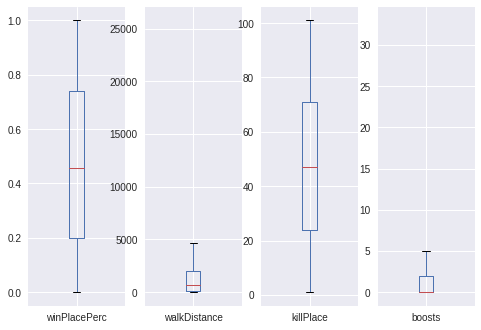

In [0]:
cols = ['winPlacePerc', 'walkDistance', 'killPlace', 'boosts']
tr_train[cols].plot(kind = 'box', subplots = True)
plt.show()

In [0]:
tr_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4446966.00,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4446966.0,4.446966e+06,4.446966e+06,4446966.000,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,NaN,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,NaN,3.496091e-03,NaN,2.386841e-02,7.918208e-03,NaN,3.660488e+00,6.064601e+02,NaN
std,5.885731e-01,1.715794e+00,NaN,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,NaN,7.337297e-02,NaN,1.673935e-01,9.261157e-02,NaN,2.456544e+00,7.397004e+02,0.000000e+00
min,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,155.125,2.000000e+00,0.000000e+00,1.999512e-01
50%,0.000000e+00,0.000000e+00,84.25,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,685.500,3.000000e+00,0.000000e+00,4.582520e-01
75%,0.000000e+00,2.000000e+00,186.00,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910095e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1976.000,5.000000e+00,1.495000e+03,7.407227e-01
max,2.200000e+01,3.300000e+01,6616.00,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.070400e+04,1.800000e+01,3824.0,1.200000e+01,5.000000e+00,25776.000,2.360000e+02,2.013000e+03,1.000000e+00
